In [1]:
# Import the data and print descriptive statistics
import pandas as pd
import seaborn as sns
dataset = pd.read_csv("Chapter7_Facies Data.csv")
print(dataset.describe())
x = dataset.iloc[:,4:11]
y = dataset.iloc[:,0].values

            Facies        Depth           GR    ILD_log10     DeltaPHI  \
count  3232.000000  3232.000000  3232.000000  3232.000000  3232.000000   
mean      4.422030  2875.824567    66.135769     0.642719     3.559642   
std       2.504243   131.006274    30.854826     0.241845     5.228948   
min       1.000000  2573.500000    13.250000    -0.025949   -21.832000   
25%       2.000000  2791.000000    46.918750     0.492750     1.163750   
50%       4.000000  2893.500000    65.721500     0.624437     3.500000   
75%       6.000000  2980.000000    79.626250     0.812735     6.432500   
max       9.000000  3122.500000   361.150000     1.480000    18.600000   

             PHIND           PE         NM_M       RELPOS  
count  3232.000000  3232.000000  3232.000000  3232.000000  
mean     13.483213     3.725014     1.498453     0.520287  
std       7.698980     0.896152     0.500075     0.286792  
min       0.550000     0.200000     1.000000     0.010000  
25%       8.346750     3.100000  

In [2]:
# Scale the input data from 0 to 1
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
xnorm = pd.DataFrame(data = sc.fit_transform(x))

# Partition the data into train and test
from sklearn.model_selection import train_test_split
seed = 50
x_train, x_test, y_train, y_test = train_test_split(xnorm, y, random_state = 1)

# Import Logistic Regression and train the model
from sklearn.linear_model import LogisticRegression
LG = LogisticRegression(max_iter = 200).fit(x_train, y_train)
y_predict = LG.predict(x_test)

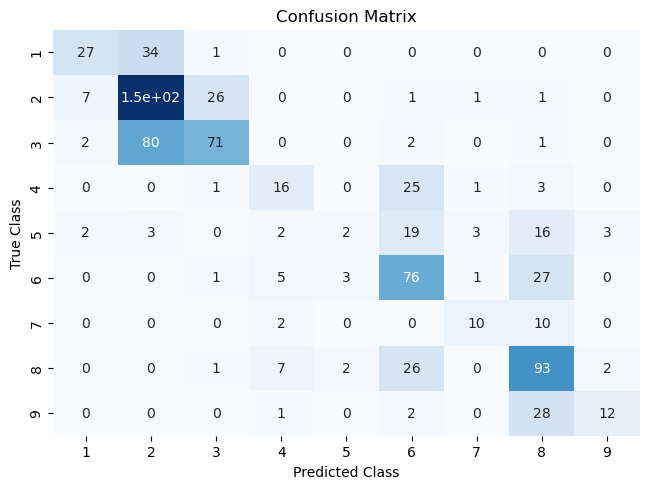

In [3]:
# Use evaluation metrics of Confusion Matrix to compare true and predicted classes of dataset.DeltaPHI
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_predict)
cv = np.arange(1, 10)
dataframe = pd.DataFrame(matrix, index = cv, columns = cv)

# Creating Heatmapof Confusion Matrix
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [4]:
# Summary of Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       0.71      0.44      0.54        62
           2       0.56      0.81      0.66       185
           3       0.70      0.46      0.55       156
           4       0.48      0.35      0.41        46
           5       0.29      0.04      0.07        50
           6       0.50      0.67      0.58       113
           7       0.62      0.45      0.53        22
           8       0.52      0.71      0.60       131
           9       0.71      0.28      0.40        43

    accuracy                           0.56       808
   macro avg       0.57      0.47      0.48       808
weighted avg       0.57      0.56      0.54       808



In [5]:
# Cross-validation for Multiclassification (5-folds cross-validation)
from sklearn.model_selection import cross_val_score
scores_kfold = cross_val_score(LG, xnorm, y, cv = 5)
print("Kfold Cross-validation scores: {}". format(scores_kfold))
print("Average Kfold cross-validation score: {}". format(scores_kfold.mean()))

Kfold Cross-validation scores: [0.52704791 0.53477589 0.4876161  0.48297214 0.57120743]
Average Kfold cross-validation score: 0.5207238935597016


In [ ]:
# 'Leave One Out' cross-validation for Classification
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores_loo = cross_val_score(LG, xnorm, y, cv = loo)
print(" Number of cv iterations-Leave One Out:". len(scores.loo))
print("Mean accuracy Leave One Out:{}". format(scores_loo.mean()))